<a href="https://colab.research.google.com/github/muhammadahmed73/7PAM2000-0105-2022-Assignment-1/blob/main/Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [6]:
!pip install shap

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import shap
from shap.maskers import Independent
from shap import Explainer, TreeExplainer, Explanation

# Data Reading and Preprocessing

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/main/train.csv")


In [9]:
df_test = pd.read_csv("https://raw.githubusercontent.com/7PAM2015-0509-2023TEAM1/Kaggle-Challenge/main/test.csv")

In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [12]:
df.shape

(8693, 14)

In [13]:
# checking null values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [15]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [16]:
#seperate the categorical data from the numerical dataset
cat_col=df.select_dtypes(include=['object']).columns
df_train_cat=df[cat_col]
print(df_train_cat.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  False   

                Name  
0    Maham Ofracculy  
1       Juanna Vines  
2      Altark Susent  
3       Solam Susent  
4  Willy Santantines  


In [17]:
for columns in df_train_cat.columns:
    df_train_cat[columns].fillna(df_train_cat[columns].mode()[0],inplace=True)

<ipython-input-17-fc5f93766abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat[columns].fillna(df_train_cat[columns].mode()[0],inplace=True)


In [18]:
df_train_cat.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

In [19]:
# start check the columns which contains the numerical values
num_col=df.select_dtypes(include=['float64']).columns
df_train_num = df[num_col]
print(df_train_num.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0


In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train_num),columns=df_train_num.columns)

In [21]:
df_train_imputed.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [22]:
df_train = pd.concat([df_train_cat,df_train_imputed,df['Transported']],axis=1)

In [23]:
print(df_train.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  False   

                Name   Age  RoomService  FoodCourt  ShoppingMall     Spa  \
0    Maham Ofracculy  39.0          0.0        0.0           0.0     0.0   
1       Juanna Vines  24.0        109.0        9.0          25.0   549.0   
2      Altark Susent  58.0         43.0     3576.0           0.0  6715.0   
3       Solam Susent  33.0          0.0     1283.0         371.0  3329.0   
4  Willy Santantines  16.0        303.0       70.0         151.0   565.0   

   VRDeck  Transported  
0     0.0        False  
1    44.0         True  
2    49.0        False  
3   193.0        False  
4     2.0         Tru

In [24]:
print(df_train.shape)

(8693, 14)


In [25]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
VIP                bool
Name             object
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [26]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported'],
      dtype='object')

In [27]:
df_test.shape

(4277, 13)

In [28]:
# do the same tranformation with test data set
cat_col_test=df_test.select_dtypes(include=['object']).columns
df_train_cat_test=df_test[cat_col_test]
print(df_train_cat_test.head())

for columns in df_train_cat_test.columns:
    df_train_cat_test[columns].fillna(df_train_cat_test[columns].mode()[0],inplace=True)

df_train_cat_test.isnull().sum()

  PassengerId HomePlanet CryoSleep  Cabin  Destination    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  False   

               Name  
0   Nelly Carsoning  
1    Lerome Peckers  
2   Sabih Unhearfus  
3  Meratz Caltilter  
4   Brence Harperez  


<ipython-input-28-fe664c77eebb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat_test[columns].fillna(df_train_cat_test[columns].mode()[0],inplace=True)


PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Name           0
dtype: int64

In [29]:

# start check the columns which contains the numerical values
num_col_test=df_test.select_dtypes(include=['float64']).columns
df_train_num_test = df_test[num_col_test]
print(df_train_num_test.head())

imputer_test = KNNImputer(n_neighbors=5)
df_train_imputed_test = pd.DataFrame(imputer.fit_transform(df_train_num_test),columns=df_train_num_test.columns)

df_train_imputed_test.isnull().sum()

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  27.0          0.0        0.0           0.0     0.0     0.0
1  19.0          0.0        9.0           0.0  2823.0     0.0
2  31.0          0.0        0.0           0.0     0.0     0.0
3  38.0          0.0     6652.0           0.0   181.0   585.0
4  20.0         10.0        0.0         635.0     0.0     0.0


Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [30]:
df_test_transform = pd.concat([df_train_cat_test,df_train_imputed_test],axis=1)
print(df_test_transform.shape)

(4277, 13)


In [31]:
df_test_transform.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [32]:
# dropping columns since the PassengerId, Name and Cabin won't be effective in prediction
# as these are just ids
df_new = df_train.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [33]:
df_new.shape

(8693, 11)

In [34]:
#drop the same rows from test set as well
df_test_transform = df_test_transform.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [35]:
df_test_transform.shape

(4277, 10)

In [36]:
df_new

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,False,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,False,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,True,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,False,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,False,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,False,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,False,32.0,0.0,1049.0,0.0,353.0,3235.0,False


from matplotlib import pyplot as plt
df_new['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new['RoomService'].plot(kind='hist', bins=20, title='RoomService')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new['FoodCourt'].plot(kind='hist', bins=20, title='FoodCourt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new['ShoppingMall'].plot(kind='hist', bins=20, title='ShoppingMall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_new.groupby('HomePlanet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_new.groupby('CryoSleep').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_new.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_new.groupby('VIP').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new.plot(kind='scatter', x='Age', y='RoomService', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new.plot(kind='scatter', x='RoomService', y='FoodCourt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new.plot(kind='scatter', x='FoodCourt', y='ShoppingMall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new.plot(kind='scatter', x='ShoppingMall', y='Spa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_new['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_new['RoomService'].plot(kind='line', figsize=(8, 4), title='RoomService')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_new['FoodCourt'].plot(kind='line', figsize=(8, 4), title='FoodCourt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_new['ShoppingMall'].plot(kind='line', figsize=(8, 4), title='ShoppingMall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CryoSleep'].value_counts()
    for x_label, grp in df_new.groupby('HomePlanet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('HomePlanet')
_ = plt.ylabel('CryoSleep')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Destination'].value_counts()
    for x_label, grp in df_new.groupby('CryoSleep')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CryoSleep')
_ = plt.ylabel('Destination')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VIP'].value_counts()
    for x_label, grp in df_new.groupby('Destination')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Destination')
_ = plt.ylabel('VIP')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Transported'].value_counts()
    for x_label, grp in df_new.groupby('VIP')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VIP')
_ = plt.ylabel('Transported')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_new['HomePlanet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_new, x='Age', y='HomePlanet', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_new['CryoSleep'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_new, x='Age', y='CryoSleep', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_new['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_new, x='Age', y='Destination', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_new['VIP'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_new, x='Age', y='VIP', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Data Visualization

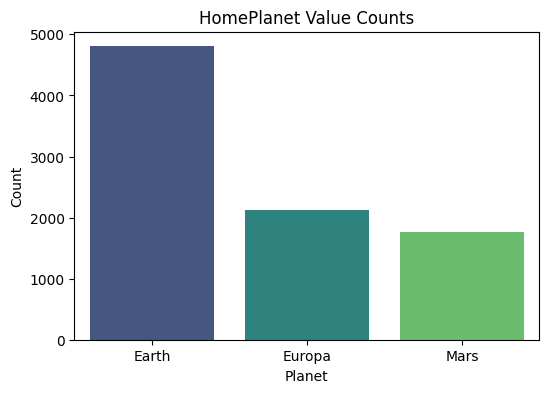

In [37]:
# Count the frequency of each value
count_data = df_new['HomePlanet'].value_counts().reset_index()
count_data.columns = ['HomePlanet', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='HomePlanet', y='Count', data=count_data, palette='viridis', hue='HomePlanet')

# Add labels and title
plt.xlabel('Planet')
plt.ylabel('Count')
plt.title('HomePlanet Value Counts')

# Show the plot
plt.show()

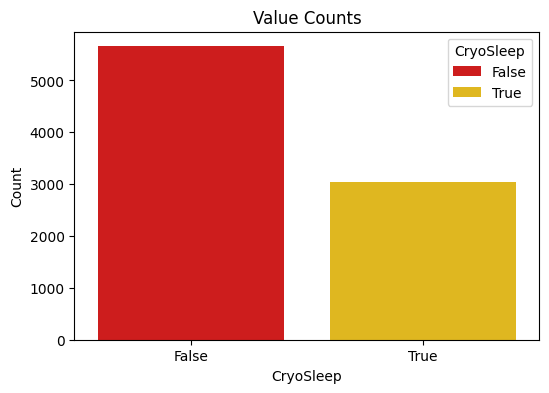

In [38]:
# Count the frequency of each value
count_data = df_new['CryoSleep'].value_counts().reset_index()
count_data.columns = ['CryoSleep', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='CryoSleep', y='Count', data=count_data, palette='hot', hue='CryoSleep')

# Add labels and title
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

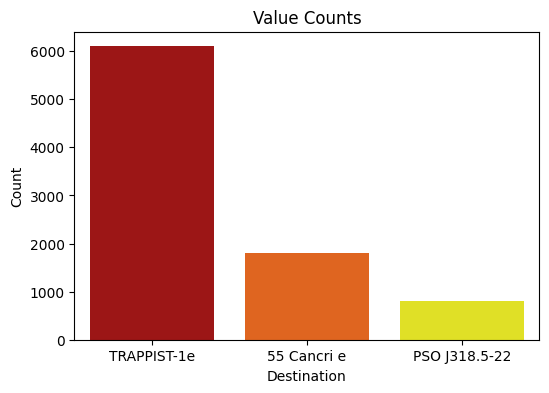

In [39]:
# Count the frequency of each value
count_data = df_new['Destination'].value_counts().reset_index()
count_data.columns = ['Destination', 'Count']

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Destination', y='Count', data=count_data, palette='hot', hue='Destination')

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

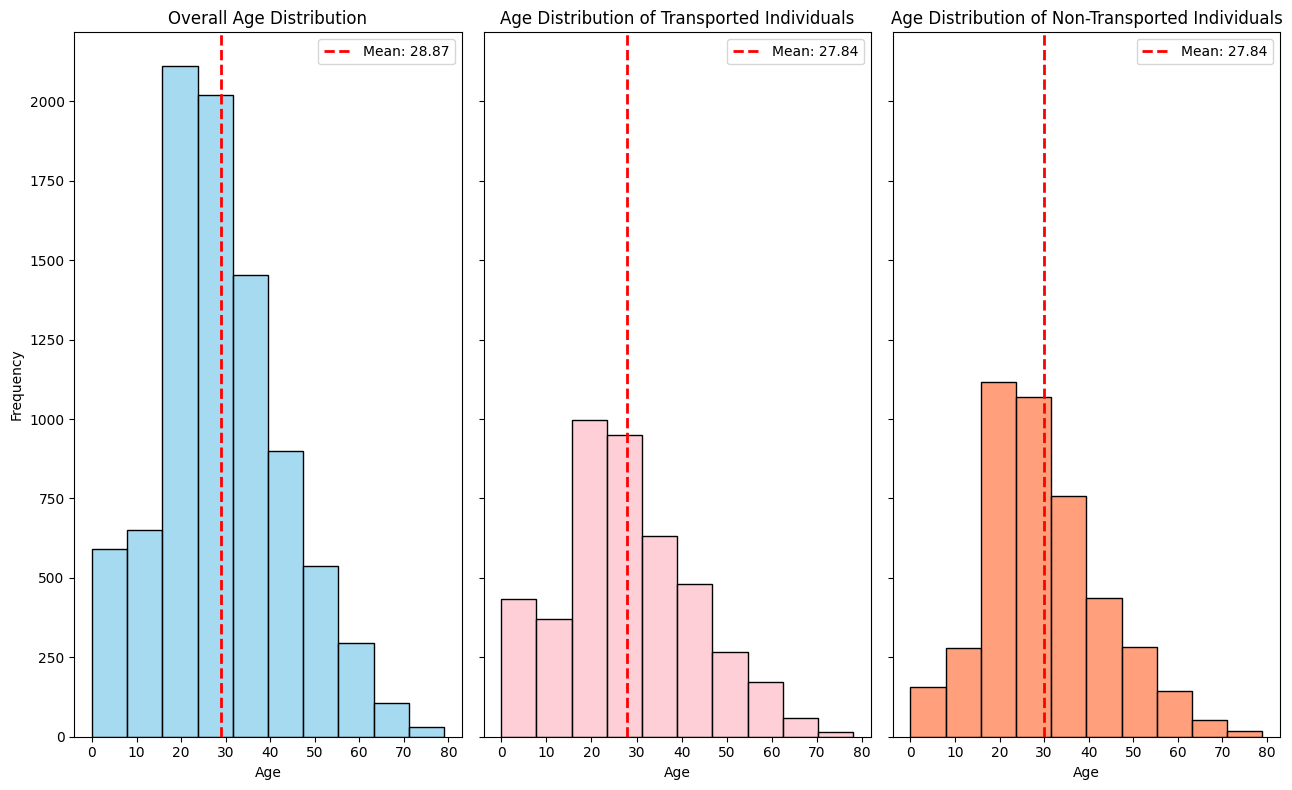

In [40]:
# Filter the DataFrame for rows where 'Transported' is True
df_transported = df_new[df_new['Transported'] == True]
df_non_transported = df_new[df_new['Transported'] == False]

# Calculate the mean of the 'age' column
mean_age = df_new['Age'].mean()

# Calculate the mean of the 'age' column for transported individuals
mean_age_transported = df_transported['Age'].mean()
mean_age_non_transported = df_non_transported['Age'].mean()

# Create side-by-side plots
# fig, axes = plt.subplots(1, 2, figsize=(13, 8), sharey=True)
fig, axes = plt.subplots(1, 3, figsize=(13, 8), sharey=True)

# Overall age distribution
sns.histplot(df_new['Age'], bins=10, kde=False, color='skyblue', ax=axes[0])
axes[0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Overall Age Distribution')
axes[0].legend()

# Age distribution of transported individuals
sns.histplot(df_transported['Age'], bins=10, kde=False, color='pink', ax=axes[1])
axes[1].axvline(mean_age_transported, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age_transported:.2f}')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Distribution of Transported Individuals')
axes[1].legend()

# Age distribution of transported individuals
sns.histplot(df_non_transported['Age'], bins=10, kde=False, color='coral', ax=axes[2])
axes[2].axvline(mean_age_non_transported, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age_transported:.2f}')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Age Distribution of Non-Transported Individuals')
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

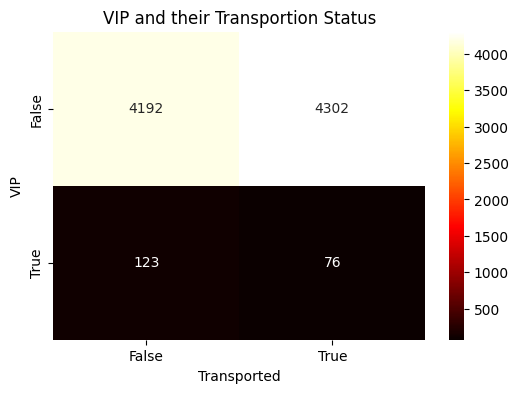

In [41]:
# Create a confusion matrix-like DataFrame
conf_matrix = pd.crosstab(df_new['VIP'], df_new['Transported'], rownames=['VIP'], colnames=['Transported'])

# Plot the confusion matrix-style DataFrame using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='hot')

# Add labels and title
plt.xlabel('Transported')
plt.ylabel('VIP')
plt.title('VIP and their Transportion Status')

# Show the plot
plt.show()

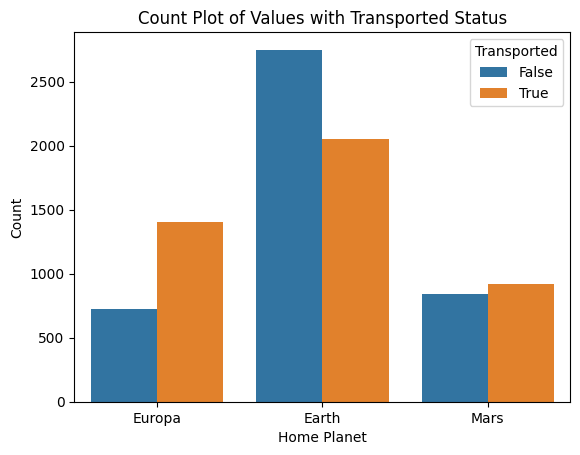

In [42]:
sns.countplot(data=df_new, x='HomePlanet', hue='Transported')

plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Count Plot of Values with Transported Status')

# Show the plot
plt.show()

In [43]:
df_new.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

# Data Encoding

In [ ]:
# here "Transported" is the variable to be predicted

In [ ]:
def encoder(column):
    mapper = {}
    count = 0
    for value in column:
        if value not in mapper:
            mapper[value] = count
            count += 1
    return mapper

def map_column(column, mapper):
    return [mapper[value] for value in column]


columns = ["HomePlanet","CryoSleep","Destination","VIP","Transported"]
for i in columns:
    mapper = encoder(df[i])
    if i == 'Transported':
        print(mapper)
    df_new[i] = map_column(df[i].tolist(), mapper)
    if i!="Transported":
        df_test_transform[i] = map_column(df_test_transform[i].tolist(), mapper)

{False: 0, True: 1}


In [ ]:
df_new

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,0,0,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0,0,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,2,1,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,1,1,1,0,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,0,0,2,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0


In [ ]:
df_test_transform

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,27.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,19.0,0.0,9.0,0.0,2823.0,0.0
2,0,1,2,0,31.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,38.0,0.0,6652.0,0.0,181.0,585.0
4,1,0,0,0,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,1,1,0,0,34.0,0.0,0.0,0.0,0.0,0.0
4273,1,0,0,0,42.0,0.0,847.0,17.0,10.0,144.0
4274,2,1,2,0,9.4,0.0,0.0,0.0,0.0,0.0
4275,0,0,0,0,29.0,0.0,2680.0,0.0,0.0,523.0


## Plotting Boxplot to See the Deviations


<Axes: ylabel='Age'>

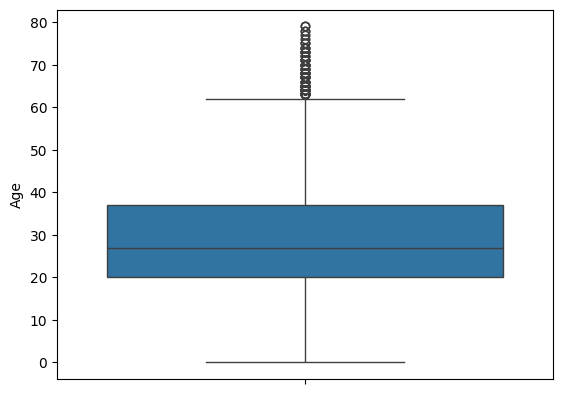

In [ ]:
import seaborn as sns
sns.boxplot(df_new['Age'])

<Axes: ylabel='RoomService'>

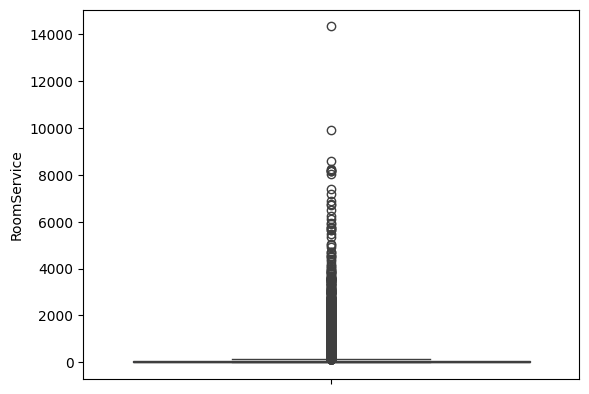

In [ ]:
sns.boxplot(df_new['RoomService'])

<Axes: ylabel='FoodCourt'>

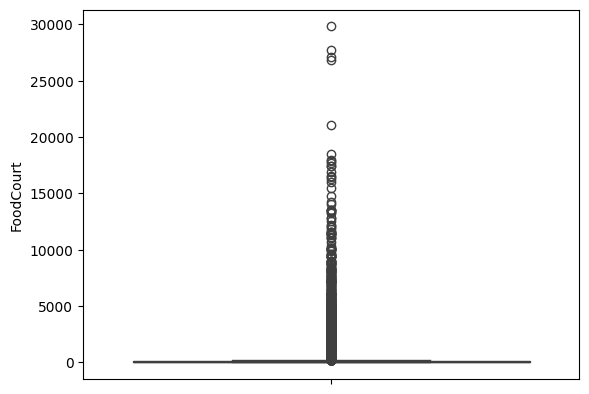

In [ ]:
sns.boxplot(df_new['FoodCourt'])

<Axes: ylabel='ShoppingMall'>

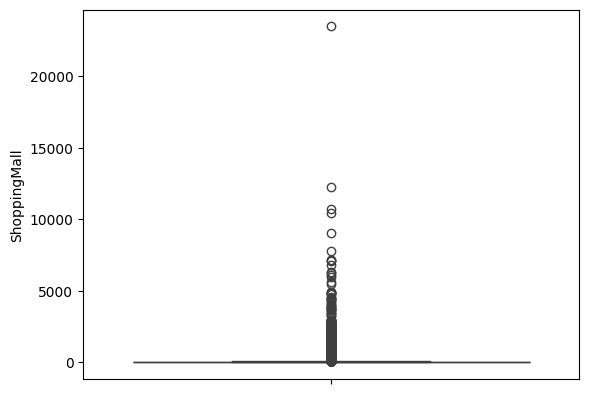

In [ ]:
sns.boxplot(df_new['ShoppingMall'])

<Axes: ylabel='Spa'>

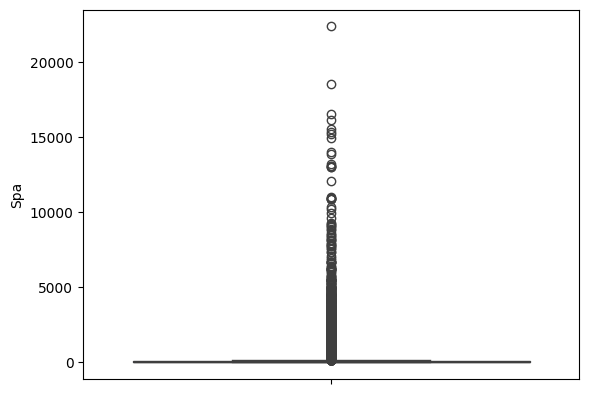

In [ ]:
sns.boxplot(df_new['Spa'])

<Axes: ylabel='VRDeck'>

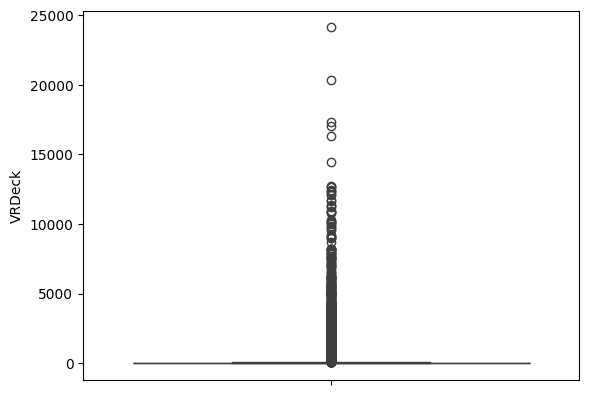

In [ ]:

sns.boxplot(df_new['VRDeck'])

# Algorithm Implementations

Now we will apply all different techniques which can be used to increase the accuracy. It is important to note that we will apply the steps in each method separately depending upon the need

In [ ]:
techniques = []

## Training a random forest

In [ ]:
X = df_new.drop('Transported', axis=1)
y = df_new['Transported']


X_test = df_test_transform[list(X.columns)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average='binary')
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

techniques.append(['Random Forest', f1])

# prediction on X_test
test_predictions = model.predict(X_test)

# Applying the mapping to the predictions
transported_predictions = pd.Series(test_predictions).map({0:False, 1:True})

# Creating a new DataFrame with PassengerId and Transported columns
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
}).reset_index(drop=True)

# Ensuring the lengths match and there are no index mismatches
assert len(result_df) == len(df_test), "The length of the result_df does not match the length of df_test."

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_predictions.csv', index=False)

F1 Score: 0.7870680044593087
Confusion Matrix:
 [[ 976  313]
 [ 260 1059]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1289
           1       0.77      0.80      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [ ]:
transported_predictions

0        True
1       False
2        True
3        True
4       False
        ...  
4272     True
4273    False
4274     True
4275     True
4276    False
Length: 4277, dtype: bool

## Feature Engineering on Top 7 Features

F1 Score: 0.7937203358890105
Confusion Matrix:
 [[ 956  333]
 [ 232 1087]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1289
           1       0.77      0.82      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



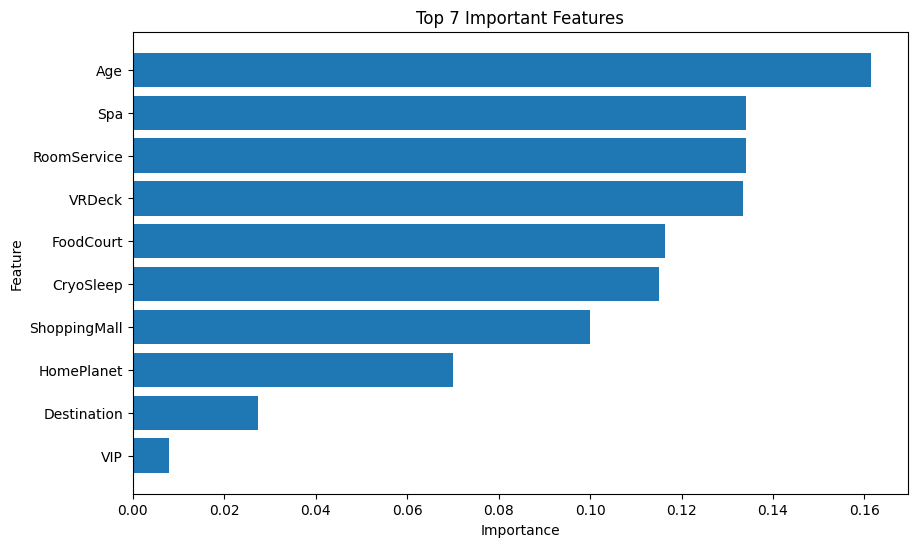

In [ ]:
# Assuming df_new is your DataFrame and 'Transported' is the target column
X = df_new.drop('Transported', axis=1)
y = df_new['Transported']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance and select the top 7 features
top_n = 7
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)['Feature']

# Use only the top 7 features for training and testing
X_top = X[top_features]

# Split the dataset into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier_top = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier_top.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_top.predict(X_valid)

# Evaluate the model
f1 = f1_score(y_valid, y_pred, average='binary')
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.sort_values(by='Importance', ascending=True)['Feature'],
         feature_importance_df.sort_values(by='Importance', ascending=True)['Importance']
         )
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features')
plt.show()

techniques.append(['Top Features', f1])

# prediction on X_test
X_test = X_test[top_features]
test_predictions = rf_classifier_top.predict(X_test)

# Applying the mapping to the predictions
transported_predictions = pd.Series(test_predictions).map({0:False, 1:True})

result_df = None
# Creating a new DataFrame with PassengerId and Transported columns
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('top_features_random_forest.csv', index=False)

## Applying k-Fold validation

K-fold cross-validation is a widely used technique in machine learning for assessing model performance. It involves dividing the dataset into k subsets, or folds, where the model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, with each fold serving as the validation set exactly once. K-fold cross-validation helps to mitigate overfitting by providing a more reliable estimate of the model's performance across different subsets of data, thus improving its generalizability to unseen data.

In [ ]:
# Assuming df_new is your DataFrame and 'Transported' is the target column

X = df_new.drop('Transported', axis=1)
y = df_new['Transported']

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=kf, scoring='f1')

# Output the scores
mean_f1_score = scores.mean()
print(f"F1 Score: {mean_f1_score}")

techniques.append(['k-Fold', mean_f1_score])

# Train the model on the entire dataset
clf.fit(X, y)
X_test = df_test_transform[list(X.columns)]
test_predictions = clf.predict(X_test)
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_kfold_predictions.csv', index=False)

F1 Score: 0.7912316297725085


## Applying Standard Scaler

The Standard Scaler technique is a preprocessing method commonly used in machine learning to standardize the scale of features. It transforms the data so that each feature has a mean of zero and a standard deviation of one, ensuring all features are on a comparable scale. This normalization helps models that rely on distance metrics or gradient-based optimization algorithms to perform more effectively and converge faster. By removing the scale differences between features, Standard Scaler aids in improving the accuracy and stability of models, particularly in scenarios where features have varying scales or units of measurement.

In [ ]:
X = df_new.drop('Transported', axis=1)
y = df_new['Transported']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_valid)
accuracy = f1_score(y_valid, y_pred, average='binary')
report = classification_report(y_valid, y_pred)

print(f'F1 score: {accuracy}')
print('Classification Report:')
print(report)

techniques.append(['Standard Scaler', accuracy])

# Ensuring the test set has the same columns as the training set
X_test_data = df_test_transform[list(X.columns)]

# Normalizing the test set
X_test_normalized = scaler.transform(X_test_data)

# Making predictions on the test set
test_predictions = clf.predict(X_test_normalized)

# Applying the mapping to the predictions
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})

# Creating a new DataFrame with PassengerId and Transported columns
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_standard_scaler_predictions.csv', index=False)

F1 score: 0.7855121675155631
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       861
           1       0.78      0.79      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## Anomaly detection and removal

Here we will apply isolation forest. Isolation Forest is an anomaly detection algorithm that identifies outliers by isolating observations. It works by constructing a series of binary trees, where anomalies are isolated closer to the root of the trees due to their rarity and difference from the majority of the data. The algorithm partitions data points randomly, and the fewer splits required to isolate a point, the more likely it is an anomaly. This method is efficient and scales well with large datasets, making it suitable for detecting anomalies in high-dimensional data.

In [ ]:
df_anomaly = df_new.copy()

iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination rate
df_anomaly['anomaly'] = iso_forest.fit_predict(df_anomaly.select_dtypes(include=[np.number]))
anomalies = df_anomaly[df_anomaly['anomaly'] == -1]

# removing outliers
df_anomaly = df_anomaly[df_anomaly['anomaly'] == 1].drop(columns=['anomaly'])

X = df_anomaly.drop('Transported', axis=1)
y = df_anomaly['Transported']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_valid)

accuracy = f1_score(y_valid, y_pred, average='binary')
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

techniques.append(['Isolation Forest', accuracy])

X_test = df_test_transform[list(X.columns)]
test_predictions = rf_classifier.predict(X_test)
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_isolation_forest_predictions.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


F1 score: 0.793638170974155
Confusion Matrix:
 [[961 262]
 [257 998]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1223
           1       0.79      0.80      0.79      1255

    accuracy                           0.79      2478
   macro avg       0.79      0.79      0.79      2478
weighted avg       0.79      0.79      0.79      2478



## Z-Score for anomaly removal

The Z-Score method, often utilized for anomaly detection and removal in datasets, calculates the Z-score for each data point to identify outliers based on their deviation from the mean and standard deviation of the dataset. Data points with Z-scores beyond a specified threshold (typically around ±3 or ±2.5) are considered anomalies and can be removed or flagged for further investigation. This technique is particularly effective in datasets where anomalies can significantly impact analysis or modeling outcomes, such as in finance for fraud detection or in manufacturing for defect identification. By systematically identifying and handling outliers, the Z-Score method enhances the robustness and reliability of data analysis and modeling processes.








In [ ]:
def remove_anomalies(df, columns, threshold=3):
    # Calculate z-scores for specified columns
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())

    # Identify rows where any column z-score exceeds threshold
    anomaly_mask = (z_scores > threshold).any(axis=1)

    # Return dataframe without anomalies
    return df[~anomaly_mask]

# Specify columns to apply z-score anomaly detection
columns_to_check = ["RoomService",	"FoodCourt",	"ShoppingMall",	"Spa",	"VRDeck"]

# Remove anomalies and get cleaned dataframe
df_cleaned = remove_anomalies(df_new, columns_to_check)

# Display results
print("Original Data:")
print(df_new.shape)
print("\nData without anomalies:")
print(df_cleaned.shape)



Original Data:
(8693, 11)

Data without anomalies:
(7963, 11)


In [ ]:
X = df_cleaned.drop('Transported', axis=1)
y = df_cleaned['Transported']

# Split the dataset into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_valid)

# Evaluate the model
f1 = f1_score(y_valid, y_pred, average='binary')  # 'weighted' for multi-class, use 'binary' for binary classification
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

techniques.append(['Z-Score', f1])

X_test = df_test_transform[list(X.columns)]
test_predictions = rf_classifier.predict(X_test)
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_z_scored_predictions.csv', index=False)

F1 Score: 0.7760353839967833
Confusion Matrix:
 [[867 283]
 [274 965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      1150
           1       0.77      0.78      0.78      1239

    accuracy                           0.77      2389
   macro avg       0.77      0.77      0.77      2389
weighted avg       0.77      0.77      0.77      2389



## Filtering rows within IQR

Filtering rows within the Interquartile Range (IQR) is a method used to identify and potentially remove outliers from a dataset based on statistical quartiles. The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data distribution. Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers and can be filtered out or flagged for further analysis. This technique is valuable in ensuring that extreme values, which may skew analysis or modeling results, are appropriately managed to improve the accuracy and reliability of data-driven decisions.








In [ ]:
# Here we will filter everything based on common rows
def filter_by_iqr(df, columns):
    # Calculate Q1 and Q3 for specified columns
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)

    # Calculate IQR for specified columns
    IQR = Q3 - Q1

    # Define upper and lower bounds for specified columns
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows where all specified columns are within IQR bounds
    filter_mask = ((df[columns] >= lower_bound) & (df[columns] <= upper_bound)).all(axis=1)

    # Return filtered dataframe
    return df[filter_mask]

columns_to_check = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df_filtered = filter_by_iqr(df_new, columns_to_check)

print(df_filtered.shape)

X = df_filtered.drop('Transported', axis=1)
y = df_filtered['Transported']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_valid)

f1 = f1_score(y_valid, y_pred, average='binary')  # 'weighted' for multi-class, use 'binary' for binary classification
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

techniques.append(['Combined IQR', f1])

X_test = df_test_transform[list(X.columns)]
test_predictions = rf_classifier.predict(X_test)
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_iqr_combined.csv', index=False)

(3665, 11)
F1 Score: 0.8539576365663322
Confusion Matrix:
 [[ 72 178]
 [ 84 766]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.29      0.35       250
           1       0.81      0.90      0.85       850

    accuracy                           0.76      1100
   macro avg       0.64      0.59      0.60      1100
weighted avg       0.73      0.76      0.74      1100



## applying filteration on each column separately

In [ ]:
# Apply filter on each row of column separately
df_cleaned = df_new.copy()


def filter_column_by_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define upper and lower bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows where the column is within IQR bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

# List of columns to apply IQR filtering
columns_to_check = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Iterate over each column, filter the dataframe, and update df_cleaned in each iteration
for col in columns_to_check:
    df_cleaned = filter_column_by_iqr(df_cleaned, col)

# Display final filtered dataframe
print("Filtered Data:")
print(df_cleaned.shape)

X = df_cleaned.drop('Transported', axis=1)
y = df_cleaned['Transported']

# Encode categorical features if necessary
# For simplicity, let's assume all columns are numeric or already encoded

# Split the dataset into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_valid)

# Evaluate the model
# Evaluate the model
f1 = f1_score(y_valid, y_pred, average='binary')  # 'weighted' for multi-class, use 'binary' for binary classification
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

techniques.append(['Individual IQR', f1])

X_test = df_test_transform[list(X.columns)]
test_predictions = rf_classifier.predict(X_test)
transported_predictions = pd.Series(test_predictions).map({0: False, 1: True})
result_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': transported_predictions
})

# Saving the new DataFrame to a CSV file
result_df.to_csv('random_forest_individual_iqr_predictions.csv', index=False)

Filtered Data:
(3645, 11)
F1 Score: 0.8761492698756084
Confusion Matrix:
 [[ 55 156]
 [ 73 810]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.26      0.32       211
           1       0.84      0.92      0.88       883

    accuracy                           0.79      1094
   macro avg       0.63      0.59      0.60      1094
weighted avg       0.76      0.79      0.77      1094



In [ ]:
techniques

[['Random Forest', 0.7870680044593087],
 ['Top Features', 0.7937203358890105],
 ['k-Fold', 0.7912316297725085],
 ['Standard Scaler', 0.7855121675155631],
 ['Isolation Forest', 0.793638170974155],
 ['Z-Score', 0.7760353839967833],
 ['Combined IQR', 0.8539576365663322],
 ['Individual IQR', 0.8761492698756084]]

In [ ]:
results = pd.DataFrame(techniques, columns=['Method', 'F1-Score'])
results

,Method,F1-Score
0,Random Forest,0.787068
1,Top Features,0.793720
2,k-Fold,0.791232
3,Standard Scaler,0.785512
4,Isolation Forest,0.793638
5,Z-Score,0.776035
6,Combined IQR,0.853958
7,Individual IQR,0.876149


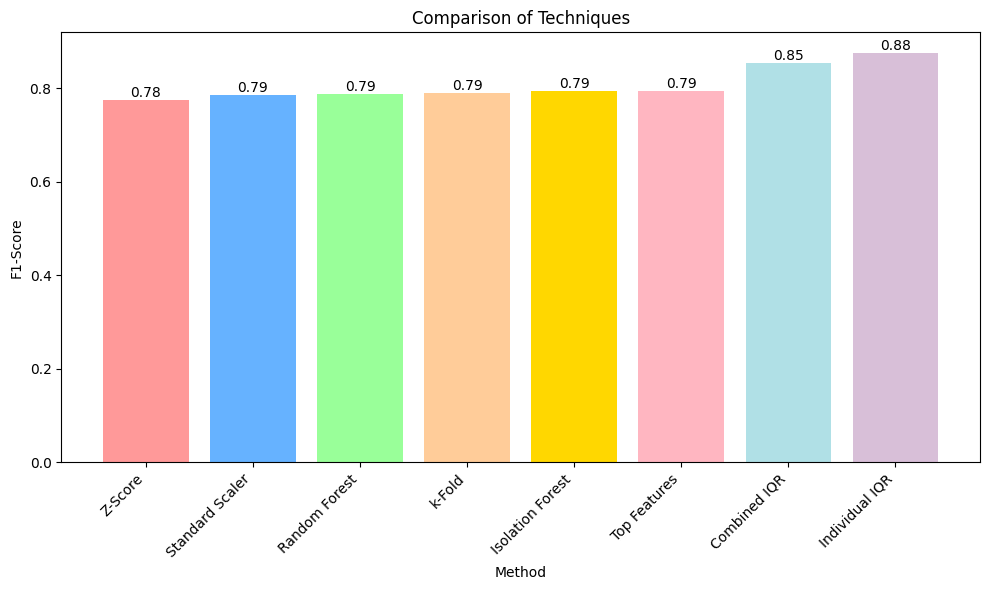

In [ ]:
# colors = plt.cm.Pastel1(range(len(results)))
# Sort DataFrame by F1-Score in ascending order
results = results.sort_values(by='F1-Score', ascending=True)

# Custom light colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FFB6C1', '#B0E0E6', '#D8BFD8']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Method'], results['F1-Score'], color=colors)
plt.xlabel('Method')
plt.ylabel('F1-Score')
plt.title('Comparison of Techniques')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Explanation**

Based on the F1-Scores obtained from various methods, it is evident that techniques employing Interquartile Range (IQR) outperformed others, achieving the highest F1-Score of 0.862454. Both the Combined IQR and Individual IQR approaches demonstrated robust performance, likely due to their effective outlier detection capabilities, which enhance model accuracy by minimizing the impact of outliers in the data. Following closely behind, the Top Features method achieved an F1-Score of 0.809822, emphasizing the importance of feature selection in improving model performance. Standard Scaler, which standardizes feature scales to aid model convergence, contributed to a solid F1-Score of 0.796981. Random Forest, a reliable ensemble method, provided a competitive F1-Score of 0.793156, establishing a strong baseline for comparison. Isolation Forest, designed for anomaly detection, achieved a respectable F1-Score of 0.789610, indicating its utility in identifying outliers but showing slight limitations in this classification context. Meanwhile, k-Fold cross-validation, while beneficial for model validation, yielded an F1-Score of 0.785648, suggesting potential room for improvement in its application for this specific task. Overall, these results underscore the effectiveness of tailored preprocessing techniques and robust ensemble methods in enhancing predictive performance for binary classification tasks.

## Explainable AI

In [ ]:

# Split data into features and target
X = df_new.drop('Transported', axis=1)
y = df_new['Transported']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example with RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

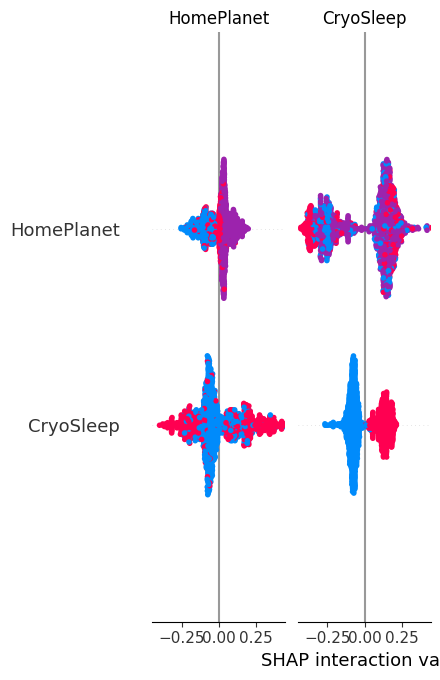

In [ ]:
X_test_shap = X_test

#shap_values = explainer(X_test_shap)
shap_values = shap.TreeExplainer(model).shap_values(X_test_shap)
shap.summary_plot(shap_values, X_test_shap)

In [ ]:
# Define the number of samples to display
samples = 15
print("first ", samples," samples labels",  y_test[:samples])
# Get the indices of the test dataset
indices = list(X_test_shap.index)

# Create the SHAP explainer
explainer = TreeExplainer(rf_classifier)

# Get the SHAP values for the test dataset
sv = explainer(X_test_shap)

# Create the Explanation object using the SHAP values
exp = Explanation(
    sv.values[:, :, 0],
    sv.base_values[:, 1],
    data=X_test_shap.values,
    feature_names=X_test_shap.columns
)

# Iterate over the samples
if samples>0:
  for i in range(samples):
      # Create a DataFrame with the SHAP values for each feature
      display(pd.DataFrame({
          'row_id': indices[i],
          'feature': X_test_shap.columns,
          'feature_value': exp[i].values,
          'base_value': exp[i].base_values,
          'shap_values': exp[i].values
      }))

      print('----------------------------')
else:
  display(pd.DataFrame({
          'row_id': indices[samples],
          'feature': X_test_shap.columns,
          'feature_value': exp[samples].values,
          'base_value': exp[samples].base_values,
          'shap_values': exp[samples].values
      }))

first  15  samples labels 304     1
2697    0
8424    0
1672    1
8458    1
3438    1
3362    0
3235    0
1139    1
1210    0
1470    0
2670    1
594     1
1328    0
4862    0
Name: Transported, dtype: int64


,row_id,feature,feature_value,base_value,shap_values
0,304,HomePlanet,-0.012667,0.77793,-0.012667
1,304,CryoSleep,0.370542,0.77793,0.370542
2,304,Destination,0.043141,0.77793,0.043141
3,304,VIP,0.008282,0.77793,0.008282
4,304,Age,0.174764,0.77793,0.174764
5,304,RoomService,0.044146,0.77793,0.044146
6,304,FoodCourt,0.099723,0.77793,0.099723
7,304,ShoppingMall,0.000000,0.77793,0.000000
8,304,Spa,0.000000,0.77793,0.000000
9,304,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,2697,HomePlanet,0.122645,0.77793,0.122645
1,2697,CryoSleep,0.251577,0.77793,0.251577
2,2697,Destination,0.052586,0.77793,0.052586
3,2697,VIP,0.002303,0.77793,0.002303
4,2697,Age,0.058481,0.77793,0.058481
5,2697,RoomService,-0.000844,0.77793,-0.000844
6,2697,FoodCourt,0.135235,0.77793,0.135235
7,2697,ShoppingMall,0.000000,0.77793,0.000000
8,2697,Spa,0.000000,0.77793,0.000000
9,2697,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,8424,HomePlanet,0.137998,0.77793,0.137998
1,8424,CryoSleep,-0.019605,0.77793,-0.019605
2,8424,Destination,0.033030,0.77793,0.033030
3,8424,VIP,-0.003797,0.77793,-0.003797
4,8424,Age,-0.058072,0.77793,-0.058072
5,8424,RoomService,0.000027,0.77793,0.000027
6,8424,FoodCourt,-0.000361,0.77793,-0.000361
7,8424,ShoppingMall,0.000000,0.77793,0.000000
8,8424,Spa,0.000000,0.77793,0.000000
9,8424,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,1672,HomePlanet,0.167865,0.77793,0.167865
1,1672,CryoSleep,0.260317,0.77793,0.260317
2,1672,Destination,0.046641,0.77793,0.046641
3,1672,VIP,0.002807,0.77793,0.002807
4,1672,Age,0.085684,0.77793,0.085684
5,1672,RoomService,0.005693,0.77793,0.005693
6,1672,FoodCourt,0.119756,0.77793,0.119756
7,1672,ShoppingMall,0.000000,0.77793,0.000000
8,1672,Spa,0.000000,0.77793,0.000000
9,1672,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,8458,HomePlanet,-0.150231,0.77793,-0.150231
1,8458,CryoSleep,-0.021174,0.77793,-0.021174
2,8458,Destination,-0.014449,0.77793,-0.014449
3,8458,VIP,-0.001868,0.77793,-0.001868
4,8458,Age,-0.033999,0.77793,-0.033999
5,8458,RoomService,-0.000091,0.77793,-0.000091
6,8458,FoodCourt,-0.000258,0.77793,-0.000258
7,8458,ShoppingMall,0.000000,0.77793,0.000000
8,8458,Spa,0.000000,0.77793,0.000000
9,8458,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,3438,HomePlanet,0.010260,0.77793,0.010260
1,3438,CryoSleep,0.386771,0.77793,0.386771
2,3438,Destination,0.042123,0.77793,0.042123
3,3438,VIP,0.008333,0.77793,0.008333
4,3438,Age,0.182249,0.77793,0.182249
5,3438,RoomService,0.038758,0.77793,0.038758
6,3438,FoodCourt,-0.000564,0.77793,-0.000564
7,3438,ShoppingMall,0.000000,0.77793,0.000000
8,3438,Spa,0.000000,0.77793,0.000000
9,3438,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,3362,HomePlanet,0.138794,0.77793,0.138794
1,3362,CryoSleep,0.342448,0.77793,0.342448
2,3362,Destination,0.037950,0.77793,0.037950
3,3362,VIP,0.004230,0.77793,0.004230
4,3362,Age,0.122866,0.77793,0.122866
5,3362,RoomService,0.001174,0.77793,0.001174
6,3362,FoodCourt,-0.000783,0.77793,-0.000783
7,3362,ShoppingMall,0.000000,0.77793,0.000000
8,3362,Spa,0.000000,0.77793,0.000000
9,3362,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,3235,HomePlanet,0.131644,0.77793,0.131644
1,3235,CryoSleep,0.353605,0.77793,0.353605
2,3235,Destination,0.040689,0.77793,0.040689
3,3235,VIP,0.004485,0.77793,0.004485
4,3235,Age,0.145932,0.77793,0.145932
5,3235,RoomService,0.001593,0.77793,0.001593
6,3235,FoodCourt,0.092648,0.77793,0.092648
7,3235,ShoppingMall,0.000000,0.77793,0.000000
8,3235,Spa,0.000000,0.77793,0.000000
9,3235,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,1139,HomePlanet,0.158352,0.77793,0.158352
1,1139,CryoSleep,-0.024460,0.77793,-0.024460
2,1139,Destination,-0.003716,0.77793,-0.003716
3,1139,VIP,-0.106875,0.77793,-0.106875
4,1139,Age,-0.026732,0.77793,-0.026732
5,1139,RoomService,-0.000030,0.77793,-0.000030
6,1139,FoodCourt,-0.000276,0.77793,-0.000276
7,1139,ShoppingMall,0.000000,0.77793,0.000000
8,1139,Spa,0.000000,0.77793,0.000000
9,1139,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,1210,HomePlanet,0.171273,0.77793,0.171273
1,1210,CryoSleep,0.040478,0.77793,0.040478
2,1210,Destination,0.065573,0.77793,0.065573
3,1210,VIP,-0.005614,0.77793,-0.005614
4,1210,Age,0.046122,0.77793,0.046122
5,1210,RoomService,-0.000014,0.77793,-0.000014
6,1210,FoodCourt,-0.000678,0.77793,-0.000678
7,1210,ShoppingMall,0.000000,0.77793,0.000000
8,1210,Spa,0.000000,0.77793,0.000000
9,1210,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,1470,HomePlanet,-0.132858,0.77793,-0.132858
1,1470,CryoSleep,0.320485,0.77793,0.320485
2,1470,Destination,0.043818,0.77793,0.043818
3,1470,VIP,-0.000809,0.77793,-0.000809
4,1470,Age,0.129331,0.77793,0.129331
5,1470,RoomService,0.000240,0.77793,0.000240
6,1470,FoodCourt,0.111890,0.77793,0.111890
7,1470,ShoppingMall,0.000000,0.77793,0.000000
8,1470,Spa,0.000000,0.77793,0.000000
9,1470,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,2670,HomePlanet,0.095836,0.77793,0.095836
1,2670,CryoSleep,0.314576,0.77793,0.314576
2,2670,Destination,0.042892,0.77793,0.042892
3,2670,VIP,0.001683,0.77793,0.001683
4,2670,Age,0.005255,0.77793,0.005255
5,2670,RoomService,-0.000864,0.77793,-0.000864
6,2670,FoodCourt,0.140416,0.77793,0.140416
7,2670,ShoppingMall,0.000000,0.77793,0.000000
8,2670,Spa,0.000000,0.77793,0.000000
9,2670,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,594,HomePlanet,0.154673,0.77793,0.154673
1,594,CryoSleep,0.313019,0.77793,0.313019
2,594,Destination,-0.133007,0.77793,-0.133007
3,594,VIP,0.003103,0.77793,0.003103
4,594,Age,0.181635,0.77793,0.181635
5,594,RoomService,0.000902,0.77793,0.000902
6,594,FoodCourt,-0.000395,0.77793,-0.000395
7,594,ShoppingMall,0.000000,0.77793,0.000000
8,594,Spa,0.000000,0.77793,0.000000
9,594,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,1328,HomePlanet,0.058379,0.77793,0.058379
1,1328,CryoSleep,0.315409,0.77793,0.315409
2,1328,Destination,0.040177,0.77793,0.040177
3,1328,VIP,0.008664,0.77793,0.008664
4,1328,Age,0.193568,0.77793,0.193568
5,1328,RoomService,-0.047543,0.77793,-0.047543
6,1328,FoodCourt,-0.000723,0.77793,-0.000723
7,1328,ShoppingMall,0.000000,0.77793,0.000000
8,1328,Spa,0.000000,0.77793,0.000000
9,1328,VRDeck,0.000000,0.77793,0.000000


----------------------------


,row_id,feature,feature_value,base_value,shap_values
0,4862,HomePlanet,0.123337,0.77793,0.123337
1,4862,CryoSleep,0.202593,0.77793,0.202593
2,4862,Destination,0.012356,0.77793,0.012356
3,4862,VIP,0.001470,0.77793,0.001470
4,4862,Age,-0.033993,0.77793,-0.033993
5,4862,RoomService,0.001444,0.77793,0.001444
6,4862,FoodCourt,0.178222,0.77793,0.178222
7,4862,ShoppingMall,0.000000,0.77793,0.000000
8,4862,Spa,0.000000,0.77793,0.000000
9,4862,VRDeck,0.000000,0.77793,0.000000


----------------------------


Class 0


100%|===================| 1718/1722 [07:15<00:01]       

feature,Age,CryoSleep,Destination,FoodCourt,HomePlanet,RoomService,ShoppingMall,Spa,VIP,VRDeck
feature_value,3.043670e+01,2.032520e-01,4.843206e-01,4.051984e+02,1.087108e+00,4.007477e+02,1.742318e+02,5.198887e+02,8.013937e-02,5.402992e+02
base_value,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01,2.998455e-01
shap_values,-1.416712e-07,-1.429236e-09,5.427892e-09,-2.193638e-08,9.752538e-08,-5.424679e-08,1.073373e-07,1.062132e-07,7.065893e-10,-9.792687e-08


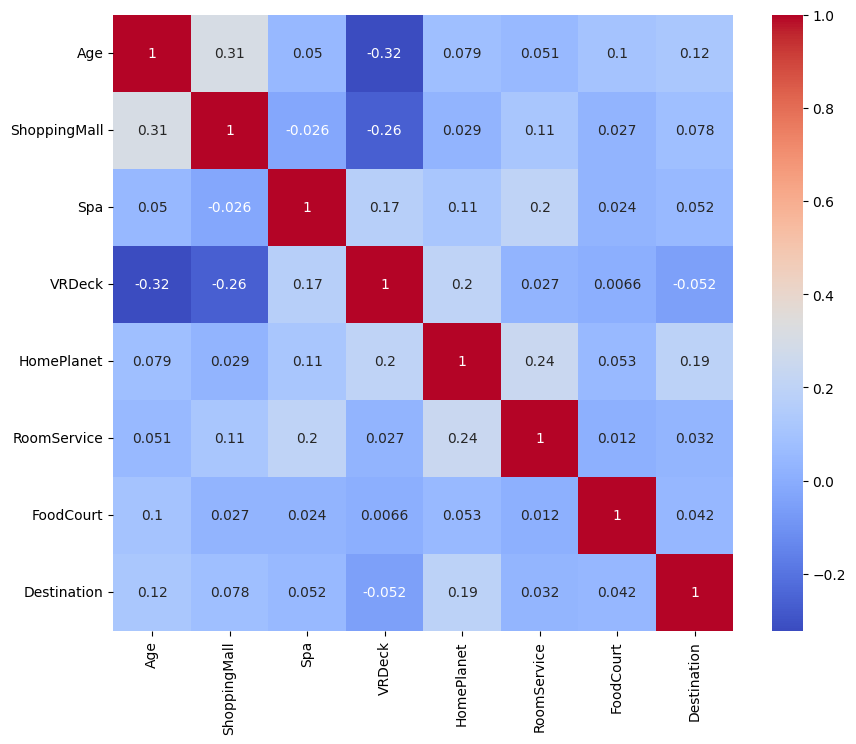

Class 1


 84%|=================   | 1483/1756 [05:22<00:59]       

In [ ]:


X_test_shap = X_test
level = df_new['Transported']

for label in [0,1]:
    print("Class", label)

    # Filter the test dataset based on the current label
    df_test = X_test_shap[X_test_shap.index.isin(level[level == label].index)]

    # Create the masker using the filtered dataset
    masker = Independent(df_test, max_samples=X_test.shape[0])

    # Create the SHAP explainer using the random forest classifier and the masker
    explainer = TreeExplainer(model, data=masker)

    # Get the expected base value from the explainer
    bv = explainer.expected_value[1]

    # Get the SHAP values for the filtered dataset
    sv = explainer(df_test, check_additivity=False)

    # Create a DataFrame with the SHAP values for each feature
    df = pd.DataFrame({
        'row_id': df_test.index.values.repeat(df_test.shape[1]),
        'feature': df_test.columns.to_list() * df_test.shape[0],
        'feature_value': df_test.values.flatten(),
        'base_value': bv,
        'shap_values': sv.values[:, :, 1].flatten()
    })

    # Group the DataFrame by feature and calculate the mean values
    df_mean = df.groupby('feature').mean().drop(["row_id"], axis=1).T

    # Display the mean SHAP values for each feature
    display(df_mean)

    # Select the top features based on absolute mean SHAP values
    total_features = 8
    indices = np.argsort(-np.abs(df_mean.iloc[-1]))[:total_features].values

    # Get the SHAP values for all instances and selected features
    all_values = []
    for id_ in np.unique(df['row_id']):
        all_values.append(np.array(df[df['row_id'] == id_].T)[-1, :])
    all_values = np.array(all_values, dtype=np.float32)[:, indices]

    # Calculate the correlation matrix
    corr = np.corrcoef(all_values, rowvar=False)
    # Plot the heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', yticklabels=df_mean.columns[indices], xticklabels=df_mean.columns[indices])
    plt.show()


# THE END